In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
import pandas as pd

hand_dataset = pd.read_csv('./data/predictions/hand_joint_data_v2.csv') 
feet_dataset = pd.read_csv('./data/predictions/feet_joint_data_v2.csv') 

Unnamed: 0            0
image_name    UAB050-LH
file_type           jpg
flip                  N
mcp_x           1192.95
mcp_y           892.956
pip_2_x         883.411
pip_2_y         505.779
pip_3_x         697.528
pip_3_y         456.243
pip_4_x         494.041
pip_4_y         531.539
pip_5_x         322.728
pip_5_y         678.903
mcp_1_x         1071.62
mcp_1_y         1029.06
mcp_2_x         856.255
mcp_2_y         752.853
mcp_3_x         693.069
mcp_3_y           736.1
mcp_4_x         552.543
mcp_4_y         784.074
mcp_5_x         425.455
mcp_5_y         845.736
w1_x             840.26
w1_y            1210.86
w2_x            667.359
w2_y            1300.89
w3_x            526.476
w3_y            1168.61
Name: 0, dtype: object


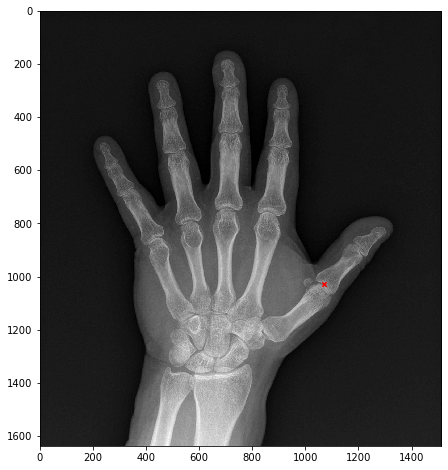

In [6]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = hand_dataset.iloc[0]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', vals['flip']], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['mcp_1_x'], vals['mcp_1_y'], 20, c = 'red', marker = 'x')
plt.show()

Unnamed: 0            4
image_name    UAB227-LF
file_type           jpg
flip                  N
mtp_x           942.051
mtp_y           396.434
mtp_1_x         981.771
mtp_1_y         704.892
mtp_2_x         702.088
mtp_2_y         599.535
mtp_3_x         548.041
mtp_3_y         642.397
mtp_4_x         395.722
mtp_4_y         734.643
mtp_5_x         235.818
mtp_5_y         870.557
Name: 4, dtype: object


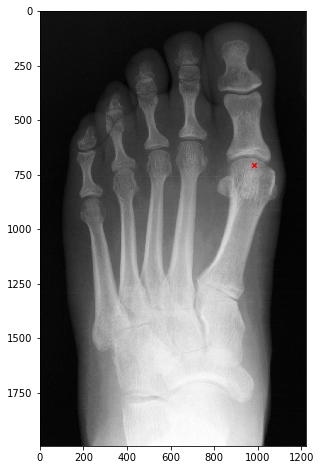

In [8]:
vals = feet_dataset.iloc[4]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', vals['flip']], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['mtp_1_x'], vals['mtp_1_y'], 20, c = 'red', marker = 'x')
plt.show()

In [10]:
from prediction.joint_detection import rsna_joint_detector

rsna_dataset = rsna_joint_detector(config, hand_detector).create_rnsa_dataset()

In [12]:
rsna_dataset.to_csv('./data/rsna_joint_data.csv')

boneage           135
coord_x       510.736
coord_y       493.962
image_name      10004
key             pip_4
sex                 1
Name: 3, dtype: object


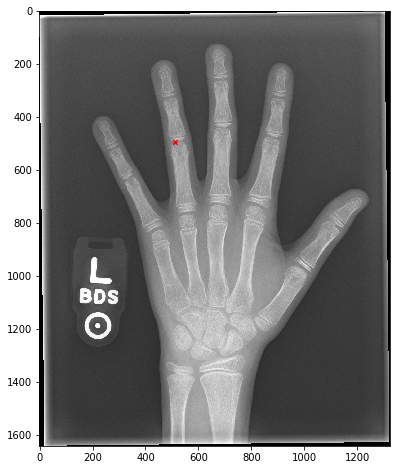

In [11]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = rsna_dataset.iloc[3]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'png', 'N'], [], '../rsna_boneAge/checked_rsna_training')

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()